In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/Datasets/Flowers/train'
valid_path = 'D:/Datasets/Flowers/test'

In [3]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
 # useful for getting number of output classes
folders = glob( 'D:/Datasets/Flowers/train/*')

In [6]:
folders

['D:/Datasets/Flowers/train\\astilbe',
 'D:/Datasets/Flowers/train\\bellflower',
 'D:/Datasets/Flowers/train\\black_eyed_susan',
 'D:/Datasets/Flowers/train\\calendula',
 'D:/Datasets/Flowers/train\\california_poppy',
 'D:/Datasets/Flowers/train\\carnation',
 'D:/Datasets/Flowers/train\\common_daisy',
 'D:/Datasets/Flowers/train\\coreopsis',
 'D:/Datasets/Flowers/train\\daffodil',
 'D:/Datasets/Flowers/train\\dandelion',
 'D:/Datasets/Flowers/train\\iris',
 'D:/Datasets/Flowers/train\\magnolia',
 'D:/Datasets/Flowers/train\\rose',
 'D:/Datasets/Flowers/train\\sunflower',
 'D:/Datasets/Flowers/train\\tulip',
 'D:/Datasets/Flowers/train\\water_lily']

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory( 'D:/Datasets/Flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 11804 images belonging to 16 classes.


In [13]:
test_set = test_datagen.flow_from_directory( 'D:/Datasets/Flowers/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3936 images belonging to 16 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
369/369 [==============================] - 380s 1s/step - loss: 3.4389 - accuracy: 0.7000 - val_loss: 3.8018 - val_accuracy: 0.7055
Epoch 2/5
369/369 [==============================] - 332s 899ms/step - loss: 2.2569 - accuracy: 0.8085 - val_loss: 3.6955 - val_accuracy: 0.7566
Epoch 3/5
369/369 [==============================] - 347s 941ms/step - loss: 2.0149 - accuracy: 0.8462 - val_loss: 4.1407 - val_accuracy: 0.7680
Epoch 4/5
369/369 [==============================] - 344s 933ms/step - loss: 1.8760 - accuracy: 0.8649 - val_loss: 4.8942 - val_accuracy: 0.7736
Epoch 5/5
369/369 [==============================] - 346s 936ms/step - loss: 1.7251 - accuracy: 0.8803 - val_loss: 3.9951 - val_accuracy: 0.8143


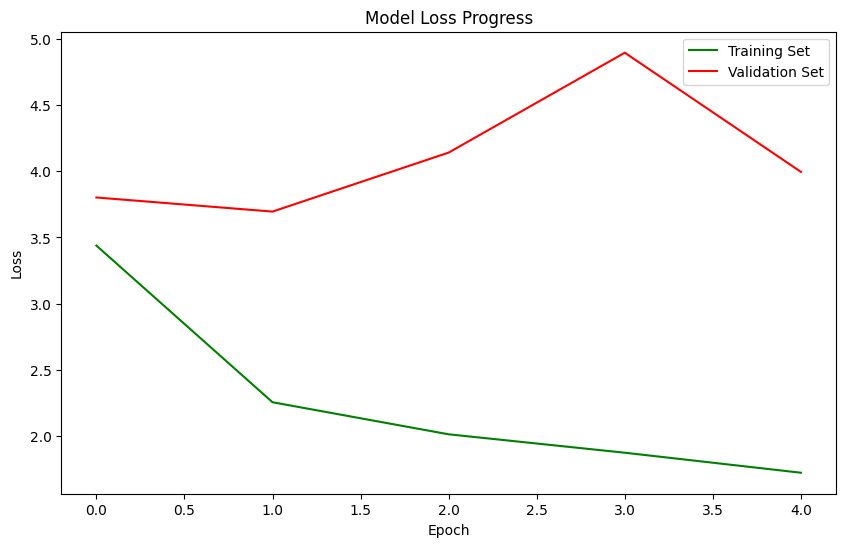

In [15]:
# plot the loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(r.history['loss'], color='green')
plt.plot(r.history['val_loss'], color='red')
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.savefig('latest_loss.png', dpi=350, bbox_inches='tight')
plt.show()

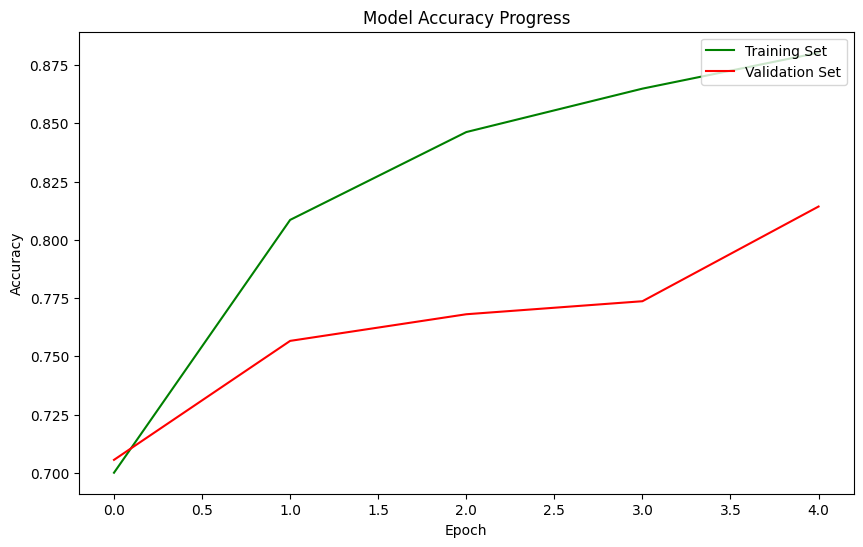

In [18]:
# plot the accuracy

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(r.history['accuracy'], color='green')
plt.plot(r.history['val_accuracy'], color='red')
plt.title('Model Accuracy Progress')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.savefig('latest_accuracy.png', dpi=350, bbox_inches='tight')
plt.show()

In [20]:
model.save_weights("cnnv4.hdf5")

In [25]:
import tensorflow
tensorflow.keras.utils.plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
